In [1]:
from torch.utils.data import DataLoader, Dataset

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Compose, Normalize
from sklearn.model_selection import train_test_split

In [2]:
from typing import *

import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import albumentations as A
from PIL import Image

# Read The Data

In [31]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
    IN_COLAB = True
except:
    IN_COLAB = False

In [4]:
if IN_COLAB:
    !unzip /content/gdrive/MyDrive/data/data.zip -d /content/data

Archive:  /content/gdrive/MyDrive/data/data.zip
  inflating: /content/data/data/1_normal.jpg  
  inflating: /content/data/data/1_pneumonia.jpg  
  inflating: /content/data/data/10_normal.jpg  
  inflating: /content/data/data/10_pneumonia.jpg  
  inflating: /content/data/data/100_normal.jpg  
  inflating: /content/data/data/100_pneumonia.jpg  
  inflating: /content/data/data/1000_normal.jpg  
  inflating: /content/data/data/1000_pneumonia.jpg  
  inflating: /content/data/data/1001_normal.jpg  
  inflating: /content/data/data/1001_pneumonia.jpg  
  inflating: /content/data/data/1002_normal.jpg  
  inflating: /content/data/data/1002_pneumonia.jpg  
  inflating: /content/data/data/1003_normal.jpg  
  inflating: /content/data/data/1003_pneumonia.jpg  
  inflating: /content/data/data/1004_normal.jpg  
  inflating: /content/data/data/1004_pneumonia.jpg  
  inflating: /content/data/data/1005_normal.jpg  
  inflating: /content/data/data/1005_pneumonia.jpg  
  inflating: /content/data/data/1006_

In [7]:
root_folder = '/content/data/data' if IN_COLAB else '../data/data'

In [13]:
filenames_normal = [f'{root_folder}/data/{i}_normal.jpg' for i in range(1, 1101)]
filenames_positive = [f'{root_folder}/data/{i}_pneumonia.jpg' for i in range(1, 1101)]
labels = list(np.zeros(1100)) + list(np.ones(1100))
filenames = filenames_normal + filenames_positive
indexes = np.arange(2200)
train_idxs, test_idxs = train_test_split(indexes, test_size=0.2)
train_idxs, val_idxs = train_test_split(indexes, test_size=0.15)
splits = np.empty(2200, dtype='str')
splits[train_idxs] = "t"
splits[val_idxs] = "v"
splits[test_idxs] = "s"

filenames = np.array(filenames)
labels = np.array(labels)
df_filenames = list(filenames[train_idxs]) + list(filenames[val_idxs]) + list(filenames[test_idxs])
df_splits = list(splits[train_idxs]) + list(splits[val_idxs]) + list(splits[test_idxs])
df_labels = list(labels[train_idxs]) + list(labels[val_idxs]) + list(labels[test_idxs])
df = pd.DataFrame({
    'filename': df_filenames,
    'splits': df_splits,
    'labels': df_labels
})
df.to_csv(f'{root_folder}/data.csv')

In [9]:
if IN_COLAB:
    !mkdir /content/data/training
    !mkdir /content/data/validation
    !mkdir /content/data/testing
    !mkdir /content/data/training/normal
    !mkdir /content/data/training/pneumonia
    !mkdir /content/data/validation/normal
    !mkdir /content/data/validation/pneumonia
    !mkdir /content/data/testing/normal
    !mkdir /content/data/testing/pneumonia
else:
    import os
    os.mkdir(f'{root_folder}/training')
    os.mkdir(f'{root_folder}/validation')
    os.mkdir(f'{root_folder}/testing')
    os.mkdir(f'{root_folder}/training/normal')
    os.mkdir(f'{root_folder}/validation/normal')
    os.mkdir(f'{root_folder}/testing/normal')
    os.mkdir(f'{root_folder}/training/pneumonia')
    os.mkdir(f'{root_folder}/validation/pneumonia')
    os.mkdir(f'{root_folder}/testing/pneumonia')

The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.


In [15]:
train_data = []
val_data = []
test_data = []

df = pd.read_csv(f'{root_folder}/data.csv')
train_filenames = df[df['splits'] == 't']['filename'].tolist()
val_filenames = df[df['splits'] == 'v']['filename'].tolist()
test_filenames = df[df['splits'] == 's']['filename'].tolist()

train_data = [np.array(Image.open(path)) for path in train_filenames]
val_data = [np.array(Image.open(path)) for path in val_filenames]
test_data = [np.array(Image.open(path)) for path in test_filenames]

print(f'Train: {train_data.__len__()} Val: {val_data.__len__()} Test: {test_data.__len__()}')

Train: 1485 Val: 275 Test: 880


In [16]:
all_data = train_data + val_data + test_data

In [18]:
dir_df_filenames = []
for filename, split, label, image in zip(df_filenames, df_splits, df_labels, all_data):
  filename = filename.split('/')[-1]
  if split == 't':
    if label == 0:
      filename = f'{root_folder}/training/normal/{filename}'
      img = Image.fromarray(image)
      img.save(filename)
    if label == 1:
      filename = f'{root_folder}/training/pneumonia/{filename}'
      img = Image.fromarray(image)
      img.save(filename)
  elif split == 'v':
    if label == 0:
      filename = f'{root_folder}/validation/normal/{filename}'
      img = Image.fromarray(image)
      img.save(filename)
    if label == 1:
      filename = f'{root_folder}/validation/pneumonia/{filename}'
      img = Image.fromarray(image)
      img.save(filename)
  elif split == 's':
    if label == 0:
      filename = f'{root_folder}/testing/normal/{filename}'
      img = Image.fromarray(image)
      img.save(filename)
    if label == 1:
      filename = f'{root_folder}/testing/pneumonia/{filename}'
      img = Image.fromarray(image)
      img.save(filename)
  dir_df_filenames.append(filename)

In [19]:
dir_df = pd.DataFrame({
    'filename': dir_df_filenames,
    'splits': df_splits,
    'labels': df_labels
})
dir_df.to_csv(f'{root_folder}/data_split_to_dirs.csv')

In [20]:
class ToNumpy:
    def __call__(self, x: Image) -> np.ndarray:
        return np.asarray(x)

class Albument:
    def __init__(self, augment) -> None:
        self.augment = augment

    def __call__(self, img: np.ndarray) -> np.ndarray:
        return self.augment(image=img)['image']

def train_transforms(target_size, normalize):
  augs = A.Compose(
      [
        A.Resize(target_size[0], target_size[1]),
        A.Affine(
            scale=(1, 1.3),
            translate_percent={
                'x': (-0.1, 0.1),
                'y': (-0.1, 0.1)
            },
            rotate=(-20, 20),
            shear=(-10, 10),
            p=0.5
        ),
        A.CLAHE(
            clip_limit=4.0,
            tile_grid_size=(8, 8),
            p=0.5
        )
      ]
  )
  albument = Albument(augs)
  transforms_list = [
      ToNumpy(),
      albument,
      ToTensor()
  ]
  if normalize:
    transforms_list.append(Normalize(
        (0.485, 0.456, 0.406),
        (0.229, 0.224, 0.225)
    ))
  return Compose(transforms_list)

def test_transforms(target_size, normalize):
  augs = A.Compose(
      [
          A.Resize(target_size[0], target_size[1])
      ]
  )
  albument = Albument(augs)
  transforms_list = [
      ToNumpy(),
      albument,
      ToTensor()
  ]
  if normalize:
    transforms_list.append(Normalize(
        (0.485, 0.456, 0.406),
        (0.229, 0.224, 0.225)
    ))
  return Compose(transforms_list)

In [21]:
class PneumoniaDataset(Dataset):
  def __init__(self, df, path_name, label_name, transforms=None):
    self.data = df
    self.transforms = transforms
    self.path_name = path_name
    self.label_name = label_name

  def __len__(self):
    return len(self.data)

  def _process_image(self, image_path):
    img = Image.open(image_path)
    print(np.array(img).shape)
    return self.transforms(img)

  def __getitem__(self, idx):
    row = self.data.iloc[idx]
    path, label = row[self.path_name], row[self.label_name]
    image = self._process_image(path)
    
    return {'input': image, 'target': label}

In [22]:
df = pd.read_csv(f'{root_folder}/data_split_to_dirs.csv')
train_df = df[df['splits'] == 't']
val_df = df[df['splits'] == 'v']
test_df = df[df['splits'] == 's']

print(f'Train: {train_df.__len__()} Val: {val_df.__len__()} Test: {test_df.__len__()}')

Train: 1485 Val: 275 Test: 880


In [23]:
BATCH_SIZE=32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [24]:
train_loader = DataLoader(PneumoniaDataset(
    train_df,
    'filename',
    'labels',
    train_transforms([224, 224], True)
), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(PneumoniaDataset(
    val_df,
    'filename',
    'labels',
    test_transforms([224, 224], True)
), batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(PneumoniaDataset(
    test_df,
    'filename',
    'labels',
    test_transforms([224, 224], True)
), batch_size=BATCH_SIZE, shuffle=False)

# Model

In [26]:
class SAEBlock(nn.Module):
    
    def __init__(
        self,
        channels: int,
        reduction: int = 16
    ) -> None:
        super(SAEBlock, self).__init__()
        assert channels >= reduction, f'Reduction = {reduction} must be <= than num of channels = {channels}'
        self.cnn = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            #nn.ReLU(),
            nn.GELU(),
            nn.Conv2d(channels // reduction, channels * 2, 1, bias=False)
        )
        
    def forward(self, x):
        dx = nn.functional.adaptive_avg_pool2d(x, 1) # Squeeze
        dx = self.cnn(dx)
        dx1, dx2 = dx.split(dx.data.size(1) // 2, dim=1) # Excitation
        dx1 = torch.sigmoid(dx1)

        return x * dx1 + dx2 # Scale and add bias

In [27]:
class InceptionBlock(nn.Module):
    
    def __init__(self,
        input_channels: int,
        channels: int,
        act_fn: nn.Module
        ) -> None:
        super(InceptionBlock, self).__init__()
        
        self.b1 = nn.Sequential(
            nn.Conv2d(input_channels, channels, (1,1)),
            nn.BatchNorm2d(channels),
            act_fn()
        )
        
        self.b2 = nn.Sequential(
            nn.Conv2d(input_channels, channels, (1, 1)),
            nn.BatchNorm2d(channels),
            act_fn(),
            
            nn.Conv2d(channels, channels, (3, 3), padding=1),
            nn.BatchNorm2d(channels),
            act_fn()
        )
        
        self.b3 = nn.Sequential(
            nn.Conv2d(input_channels, channels, (1, 1)),
            nn.BatchNorm2d(channels),
            act_fn(),
            
            nn.Conv2d(channels, channels, (5, 5), padding=2),
            nn.BatchNorm2d(channels),
            act_fn() 
        )
        
        self.b4 = nn.Sequential(
            nn.MaxPool2d((3, 3), 1, 1),
            nn.Conv2d(input_channels, channels, (1, 1)),
            nn.BatchNorm2d(channels),
            act_fn(),
        )
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        
        x1 = self.b1(x)
        x2 = self.b2(x)
        x3 = self.b3(x)
        x4 = self.b4(x)
        
        cat = torch.cat([x1, x2, x3, x4], dim=1)
        
        return cat

In [28]:
class ResNetBlock(nn.Module):
    
    def __init__(
        self,
        channels: int,
        act_fn
    ) -> None:
        super(ResNetBlock, self).__init__()
        self.inception_block = InceptionBlock(channels, channels, act_fn)
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(channels * 4, channels, 3, padding=1, bias=False),
            nn.BatchNorm2d(channels)
        )
        
        self.act_fn = act_fn()

    def forward(self, x):
        x2 = self.inception_block(x)
        x2 = self.conv2(x2)

        out = x + x2
        return self.act_fn(out)

In [29]:
class ResNetSEBlock(nn.Module):
    
    def __init__(
        self,
        channels: int,
        act_fn
    ) -> None:
        super(ResNetSEBlock, self).__init__()
        self.inception_block = InceptionBlock(channels, channels, act_fn)
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(channels * 4, channels, 3, padding=1, bias=False),
            nn.BatchNorm2d(channels)
        )

        self.seb = SAEBlock(channels)
        
        self.act_fn = act_fn()

    def forward(self, x):
        x2 = self.inception_block(x)
        x2 = self.conv2(x2)
        x2 = self.seb(x2)

        out = x + x2
        return self.act_fn(out)

In [30]:
class InceptionModel(nn.Module):
    
    def __init__(self,
        c_in: int,
        blocks: int,
        filters: int,
        ac_fn: nn.Module = nn.GELU,
        seb: bool = True
    ) -> None:
        super(InceptionModel, self).__init__()
        
        self.input_conv = nn.Sequential(
            nn.Conv2d(c_in, filters, 2, padding=1, bias=False),
            nn.BatchNorm2d(filters),
            ac_fn()
        )
        
        if seb:
          self.incepts = nn.Sequential(
              *[ResNetSEBlock(filters, act_fn=ac_fn) for i in range(blocks)]
          )
        else:
          self.incepts = nn.Sequential(
              *[ResNetBlock(filters, act_fn=ac_fn) for i in range(blocks)]
          )
        
        self.output_conv = nn.Sequential(
            nn.Conv2d(filters, 128, 1, padding=0, bias=False),
            nn.BatchNorm2d(128),
            ac_fn()
        )

        self.fc = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.input_conv(x)
        #raise Exception(x.shape)
        x = self.incepts(x)
        
        x = self.output_conv(x)
        x = nn.functional.adaptive_avg_pool2d(x, 1)

        x = x.view(x.data.size(0), -1)
        x = self.fc(x)
        return x

# Train pipeline

In [31]:
import tqdm


def train_val(
    model, 
    optimizer, 
    scheduler,
    criterion,
    train_loader: DataLoader,
    val_loader: DataLoader,
    l1_alpha: float,
    epochs: int = 200
):
    loss_history = {
        'train': [], 
        'val': []
    }
    for e in (tqdm.tqdm(range(epochs))):
        train_loss = []
        model.train()
        for x, y in train_loader:
            x = x.to(DEVICE)
            y = y.to(DEVICE)
            optimizer.zero_grad()
            output = model(x.view(-1, 1, 28, 28))
            loss = criterion(output, y)
            
 
            
            #l1_norm = sum(torch.linalg.norm(p, 1) for p in model.parameters())

            #loss = loss + l1_norm * l1_alpha 
            train_loss.append(loss.item())
            loss.backward()
            
            
            
            optimizer.step()
        
        loss_history['train'].append(np.mean(train_loss))
        val_loss = []
        model.eval()
        for x, y in val_loader:
            with torch.no_grad():
                x = x.to(DEVICE)
                y = y.to(DEVICE)
                output = model(x.view(-1, 1, 28, 28))
                loss = criterion(output, y)
                #l1_norm = sum(torch.linalg.norm(p, 1) for p in model.parameters())
                #loss = loss + l1_norm * l1_alpha 
                val_loss.append(loss.item())
        loss_history['val'].append(np.mean(val_loss))
        scheduler.step(np.mean(val_loss))
        print(f'{np.mean(val_loss)}')
#        pbar.set_description(f"Valid loss: {np.mean(val_loss)}")
    return loss_history

from sklearn.metrics import accuracy_score, f1_score


def metrics(preds, trues):
    acc = accuracy_score(preds, trues)
    f1_macro = f1_score(preds, trues, average='macro')
    f1_micro = f1_score(preds, trues, average='micro')
    print(f'Accuracy = {round(acc * 100, 2)}\nMacro F1 = {round(f1_macro * 100, 2)}\nMicro F1 = {round(f1_micro * 100, 2)}')
    
    
def test_model(model, test_loader, metric_function):
    preds = []
    trues = []
    model.eval()
    with torch.no_grad():
        for x, y in tqdm.tqdm(test_loader):
            x = x.to(DEVICE)
            pred = model(x.view(-1, 1, 28, 28))
            preds.append(torch.argmax(pred, axis=1).detach().cpu())
            trues.append(y)
    metric_function(preds=torch.cat(preds), trues=torch.cat(trues))

# Pure inception

In [ ]:
model = InceptionModel(
    c_in=1,
    filters=16,
    blocks=8,
    ac_fn=nn.GELU,
    seb=False
)
model.to(DEVICE)
print()
#print(model)

In [ ]:
LR=1e-3
WD=1e-5
factor=0.1

optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WD)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=1)

In [ ]:
loss_history = train_val(
    model, 
    optimizer, 
    scheduler, 
    criterion=nn.CrossEntropyLoss(), 
    train_loader=train_loader, 
    val_loader=val_loader, 
    l1_alpha = 0.0,
    epochs=20
)

  5%|▌         | 1/20 [01:20<25:24, 80.23s/it]

0.09159264080589703


 10%|█         | 2/20 [02:40<24:01, 80.07s/it]

0.058948928059296725


 15%|█▌        | 3/20 [04:00<22:41, 80.08s/it]

0.03639248031866902


 20%|██        | 4/20 [05:20<21:22, 80.14s/it]

0.035852212593944395


 25%|██▌       | 5/20 [06:39<19:57, 79.82s/it]

0.032011267812699674


 30%|███       | 6/20 [07:59<18:39, 79.93s/it]

0.03108502218664082


 35%|███▌      | 7/20 [09:19<17:17, 79.78s/it]

0.03647720251139088


 40%|████      | 8/20 [10:39<15:58, 79.89s/it]

0.02776425322387714


 45%|████▌     | 9/20 [11:59<14:39, 79.95s/it]

0.023855787408157338


 50%|█████     | 10/20 [13:19<13:17, 79.79s/it]

0.033918329124551116


 55%|█████▌    | 11/20 [14:38<11:58, 79.82s/it]

0.02361691050008895


 60%|██████    | 12/20 [15:59<10:39, 79.90s/it]

0.027716983279910665


 65%|██████▌   | 13/20 [17:18<09:18, 79.73s/it]

0.02647455551607678


 70%|███████   | 14/20 [18:38<07:58, 79.81s/it]

0.015822770031863522


 75%|███████▌  | 15/20 [19:58<06:39, 79.81s/it]

0.016109708908612796


 80%|████████  | 16/20 [21:18<05:20, 80.06s/it]

0.017337465420547902


 85%|████████▌ | 17/20 [22:38<03:59, 79.86s/it]

0.0165345903000898


 90%|█████████ | 18/20 [23:56<02:39, 79.50s/it]

0.015630554755519995


 95%|█████████▌| 19/20 [25:15<01:19, 79.38s/it]

0.015905142294270508


100%|██████████| 20/20 [26:36<00:00, 79.81s/it]

0.015922679679688564


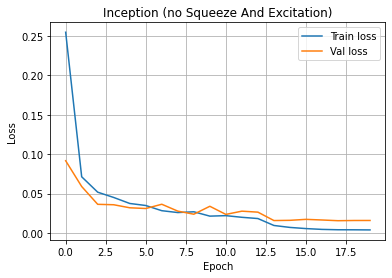

In [ ]:
domain = range(len(loss_history['train']))
train, val = loss_history['train'], loss_history['val']
plt.plot(domain, train, label='Train loss')
plt.plot(domain, val, label='Val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Inception (no Squeeze And Excitation)')
plt.grid()
plt.show()

In [ ]:
test_model(model, test_loader, metrics)

100%|██████████| 313/313 [00:04<00:00, 75.84it/s]

Accuracy = 99.57
Macro F1 = 99.57
Micro F1 = 99.57


# Inception + Squeeze And Excitation

In [72]:
model_seb = InceptionModel(
    c_in=1,
    filters=16,
    blocks=8,
    ac_fn=nn.GELU,
    seb=True
)
model_seb.to(DEVICE)
print()
#print(model)

In [64]:
LR=1e-3
WD=1e-5
factor=0.1

optimizer_seb = torch.optim.AdamW(model_seb.parameters(), lr=LR, weight_decay=WD)
scheduler_seb = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_seb, factor=0.1, patience=1)

In [68]:
loss_history = train_val(
    model_seb, 
    optimizer_seb, 
    scheduler_seb, 
    criterion=nn.CrossEntropyLoss(), 
    train_loader=train_loader, 
    val_loader=val_loader, 
    l1_alpha = 0.0,
    epochs=20
)

  0%|          | 0/20 [00:00<?, ?it/s]

(1480, 1752)


RuntimeError: ignored

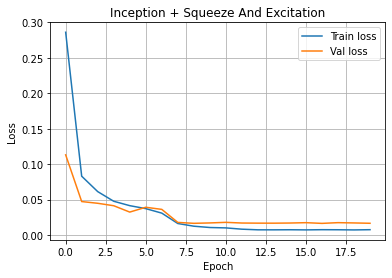

In [ ]:
domain = range(len(loss_history['train']))
train, val = loss_history['train'], loss_history['val']
plt.plot(domain, train, label='Train loss')
plt.plot(domain, val, label='Val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Inception + Squeeze And Excitation')
plt.grid()
plt.show()

In [ ]:
test_model(model_seb, test_loader, metrics)

100%|██████████| 313/313 [00:04<00:00, 64.81it/s]

Accuracy = 99.64
Macro F1 = 99.64
Micro F1 = 99.64
